# Megaline Mobile Legacy to New Plan Conversion

## Stage 1 - Load and Explore Data

### Import the needed libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load Source Data, Define Features and Target, Verify Target is a Binary Classification

In [56]:
df = pd.read_csv('datasets/users_behavior.csv')

features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Inspect Unique Values in Target
print(target.unique())

# Count Class Distribution
print(target.value_counts())

# Data Type Check
print(target.dtype)

[0 1]
is_ultra
0    2229
1     985
Name: count, dtype: int64
int64


## Stage 2 - Split Data
>*  Split Ratio = 3:1:1
>*  Random State = 12345

In [57]:
# split Source Data into Training Set of 60% and a Val/Test set of 40%
features_train, features_val_test, target_train, target_val_test = train_test_split(features, target, test_size=0.40, random_state=12345)

# split Val/Test Set into Validation set of 20% and a Test set of 20%
features_val, features_test, target_val, target_test = train_test_split(features_val_test, target_val_test, test_size=0.5, random_state=12345)

## Stage 3 - Train & Validate Baseline Models
>* Decision Tree Classifier
>* Random Forest Classifier
>* Looking for Validation Accuracy >= 0.75

Tree depth: 1 Validation Accuracy: 0.7542768273716952
Tree depth: 2 Validation Accuracy: 0.7822706065318819
Tree depth: 3 Validation Accuracy: 0.7853810264385692
Tree depth: 4 Validation Accuracy: 0.7791601866251944
Tree depth: 5 Validation Accuracy: 0.7791601866251944
Tree depth: 6 Validation Accuracy: 0.7838258164852255
Tree depth: 7 Validation Accuracy: 0.7822706065318819
Tree depth: 8 Validation Accuracy: 0.7791601866251944
Tree depth: 9 Validation Accuracy: 0.7822706065318819
Tree depth: 10 Validation Accuracy: 0.7744945567651633
Tree depth: 11 Validation Accuracy: 0.7620528771384136
Tree depth: 12 Validation Accuracy: 0.7620528771384136
Tree depth: 13 Validation Accuracy: 0.7558320373250389
Tree depth: 14 Validation Accuracy: 0.7589424572317263
Tree depth: 15 Validation Accuracy: 0.7465007776049767
Tree depth: 16 Validation Accuracy: 0.7340590979782271
Tree depth: 17 Validation Accuracy: 0.7356143079315708
Tree depth: 18 Validation Accuracy: 0.7309486780715396
Tree depth: 19 Vali

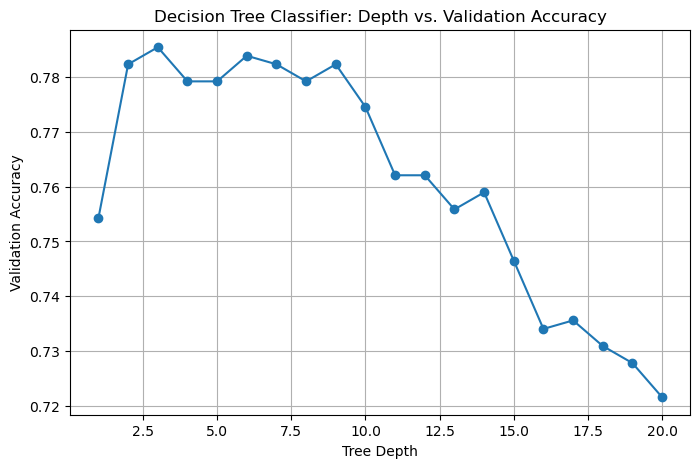

In [58]:
# DecisionTreeClassifier
# Store Results here
depths = []
accuracies = []

for depth in range(1, 21):
        # train model on training set
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model.fit(features_train, target_train)
        # get model predictions on validation set
        predictions_val = model.predict(features_val)
        accuracy = accuracy_score(target_val, predictions_val)

        depths.append(depth)
        accuracies.append(accuracy)
        print("Tree depth:", depth, "Validation Accuracy:", accuracy)

# now plot results
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.title('Decision Tree Classifier: Depth vs. Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

### Best Decision Tree Classifier
>* Tree depth: 3
>* Validation Accuracy: 0.7853810264385692

Trees: 10 Depth: 1 Validation Accuracy: 0.7558320373250389
Trees: 10 Depth: 2 Validation Accuracy: 0.7776049766718507
Trees: 10 Depth: 3 Validation Accuracy: 0.7853810264385692
Trees: 10 Depth: 4 Validation Accuracy: 0.7900466562986003
Trees: 10 Depth: 5 Validation Accuracy: 0.7931570762052877
Trees: 10 Depth: 6 Validation Accuracy: 0.8009331259720062
Trees: 10 Depth: 7 Validation Accuracy: 0.7947122861586314
Trees: 10 Depth: 8 Validation Accuracy: 0.7962674961119751
Trees: 10 Depth: 9 Validation Accuracy: 0.7853810264385692
Trees: 10 Depth: 10 Validation Accuracy: 0.7916018662519441
Trees: 10 Depth: 11 Validation Accuracy: 0.7962674961119751
Trees: 10 Depth: 12 Validation Accuracy: 0.7884914463452566
Trees: 10 Depth: 13 Validation Accuracy: 0.7884914463452566
Trees: 10 Depth: 14 Validation Accuracy: 0.7698289269051322
Trees: 10 Depth: 15 Validation Accuracy: 0.7791601866251944
Trees: 10 Depth: 16 Validation Accuracy: 0.7791601866251944
Trees: 10 Depth: 17 Validation Accuracy: 0.782270

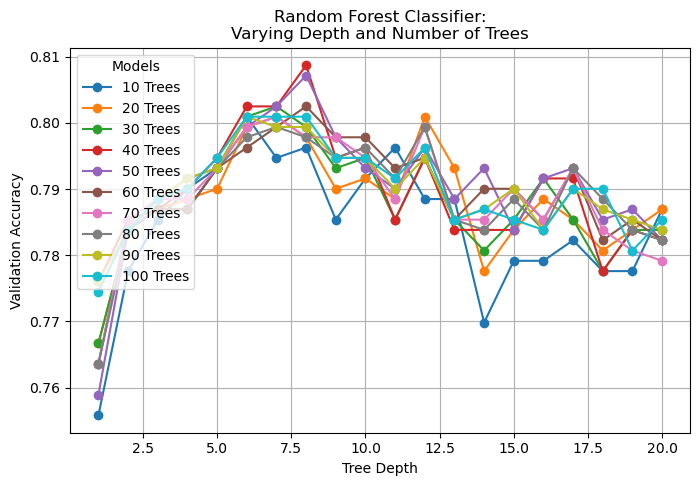

In [59]:
# RandomForestClassifier
# Store Results here
results = {}

for trees in range(10, 101, 10):
    depths = []
    accuracies = []
    for depth in range(1, 21):
        # train model on training set
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=trees)
        model.fit(features_train, target_train)
        # get model predictions on validation set
        predictions_val = model.predict(features_val)
        accuracy = accuracy_score(target_val, predictions_val)

        depths.append(depth)
        accuracies.append(accuracy)
        print("Trees:", trees, "Depth:", depth, "Validation Accuracy:", accuracy)
    results[trees] = (depths, accuracies)

# now plot results
plt.figure(figsize=(8, 5))
for trees, (depths, accuracies) in results.items():
    plt.plot(depths, accuracies, marker='o', label=f"{trees} Trees")
plt.title('Random Forest Classifier:\nVarying Depth and Number of Trees')
plt.xlabel('Tree Depth')
plt.ylabel('Validation Accuracy')
plt.legend(title="Models", loc="upper left")
plt.grid(True)
plt.show()

### Best Random Forest Classifier
>* Number of Trees: 40
>* Tree Depth: 8
>* Validation Accuracy: 0.8087091757387247

## Stage 4 - Select Best Model and Final Test
>* Final Test Accuracy >= 0.75

In [60]:
# Final Model Test

final_model = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=40)
final_model.fit(features_test, target_test)
final_predictions = final_model.predict(features_test)
final_accuracy = accuracy_score(target_test, final_predictions)
print("Final Model Test Accuracy:", final_accuracy)

Final Model Test Accuracy: 0.9020217729393468
